### Bike Share: Lesson 6
### Iris: Lesson 7
### College Admission: Lesson 8
### Flight Delay: Lesson 9
### Evergreen: Lesson 10
### Beer: Lesson 12

In [ ]:
# supervised vs unsupervised models
# good R2 or good score on cross validation


In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = pd.read_csv('../Final Project/DataScienceFinalProjectValuesCSV.csv')
#data2 = pd.read_csv('../Final Project/DataScienceFinalProjectValues2set.csv')

In [3]:
data.head()

,Ticker,Broker_Score_ct,Broker_Score_wtg,Benchmark,1_Yr_Return,3_Yr_Return,5_Yr_Return,7_Yr_Return,1_Yr_Return_BM,3_Yr_Return_BM,...,Net_Expense_Ratio,Avg_Mkt_Cap_M,P_E,P_B,P_S,P_C,Debt_to_Capital,Net_Margin,ROA,ROE
0,AADIX,0,0,S&P500,17.91,-8.10,2.76,3.88,14.53,-8.13,...,0.17,24386.36,19.33,2.97,1.49,11.47,18.30,12.68,8.72,16.98
1,ABALX,1914,1621,S&P500,11.12,-3.80,3.90,5.28,14.53,-8.13,...,0.17,65166.85,17.04,2.83,1.30,10.95,25.58,11.70,9.77,19.22
2,ADGAX,748,1575,S&P500,13.82,-7.99,1.83,4.13,14.53,-8.13,...,0.62,43517.39,19.53,2.57,1.76,12.34,32.81,11.85,9.44,17.56
3,AFDAX,1432,1553,S&P500,19.17,-3.85,4.08,5.54,14.53,-8.13,...,1.19,41518.15,17.16,2.89,1.70,11.88,26.75,14.47,11.45,21.90
4,AGOCX,2074,1774,S&P500,16.17,-6.38,6.33,6.01,14.53,-8.13,...,2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(1031, 29)

In [5]:
data.dtypes

Ticker                object
Broker_Score_ct        int64
Broker_Score_wtg       int64
Benchmark             object
1_Yr_Return          float64
3_Yr_Return          float64
5_Yr_Return          float64
7_Yr_Return          float64
1_Yr_Return_BM       float64
3_Yr_Return_BM       float64
5_Yr_Return_BM       float64
7_Yr_Return_BM       float64
AUM                  float64
AUM_2016             float64
Num_of_Holdings      float64
Turnover_2005        float64
Turnover_2004        float64
Turnover_2003        float64
3_yr_Turnover_Avg    float64
Net_Expense_Ratio    float64
Avg_Mkt_Cap_M        float64
P_E                  float64
P_B                  float64
P_S                  float64
P_C                  float64
Debt_to_Capital      float64
Net_Margin           float64
ROA                  float64
ROE                  float64
dtype: object

In [6]:
#print (data != 0).sum()
print (data['Broker_Score_ct'] == 0).sum()

205


In [7]:
cleandata = data[data.Broker_Score_ct != 0]

In [8]:
cleandata.shape

(826, 29)

In [9]:
cleandata.isnull().sum()

Ticker                 0
Broker_Score_ct        0
Broker_Score_wtg       0
Benchmark              0
1_Yr_Return            7
3_Yr_Return            7
5_Yr_Return            7
7_Yr_Return           27
1_Yr_Return_BM         0
3_Yr_Return_BM         0
5_Yr_Return_BM         0
7_Yr_Return_BM         0
AUM                   10
AUM_2016               0
Num_of_Holdings      177
Turnover_2005         27
Turnover_2004        190
Turnover_2003        252
3_yr_Turnover_Avg     20
Net_Expense_Ratio      7
Avg_Mkt_Cap_M        174
P_E                  179
P_B                  174
P_S                  174
P_C                  191
Debt_to_Capital      196
Net_Margin           174
ROA                  174
ROE                  174
dtype: int64

In [10]:
cleandata = cleandata[np.isfinite(cleandata['5_Yr_Return'])]
cleandata = cleandata[np.isfinite(cleandata['7_Yr_Return'])]

In [11]:
cleandata.isnull().sum()

Ticker                 0
Broker_Score_ct        0
Broker_Score_wtg       0
Benchmark              0
1_Yr_Return            0
3_Yr_Return            0
5_Yr_Return            0
7_Yr_Return            0
1_Yr_Return_BM         0
3_Yr_Return_BM         0
5_Yr_Return_BM         0
7_Yr_Return_BM         0
AUM                    5
AUM_2016               0
Num_of_Holdings      173
Turnover_2005         20
Turnover_2004        181
Turnover_2003        243
3_yr_Turnover_Avg     14
Net_Expense_Ratio      3
Avg_Mkt_Cap_M        171
P_E                  176
P_B                  171
P_S                  171
P_C                  188
Debt_to_Capital      193
Net_Margin           171
ROA                  171
ROE                  171
dtype: int64

In [12]:
cleandata.head()

,Ticker,Broker_Score_ct,Broker_Score_wtg,Benchmark,1_Yr_Return,3_Yr_Return,5_Yr_Return,7_Yr_Return,1_Yr_Return_BM,3_Yr_Return_BM,...,Net_Expense_Ratio,Avg_Mkt_Cap_M,P_E,P_B,P_S,P_C,Debt_to_Capital,Net_Margin,ROA,ROE
1,ABALX,1914,1621,S&P500,11.12,-3.80,3.90,5.28,14.53,-8.13,...,0.17,65166.85,17.04,2.83,1.30,10.95,25.58,11.70,9.77,19.22
2,ADGAX,748,1575,S&P500,13.82,-7.99,1.83,4.13,14.53,-8.13,...,0.62,43517.39,19.53,2.57,1.76,12.34,32.81,11.85,9.44,17.56
3,AFDAX,1432,1553,S&P500,19.17,-3.85,4.08,5.54,14.53,-8.13,...,1.19,41518.15,17.16,2.89,1.70,11.88,26.75,14.47,11.45,21.90
4,AGOCX,2074,1774,S&P500,16.17,-6.38,6.33,6.01,14.53,-8.13,...,2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AGTHX,2929,1236,S&P500,12.27,-8.27,2.91,4.07,14.53,-8.13,...,2.15,32239.22,21.36,3.37,1.91,13.21,21.06,13.91,9.20,17.09


In [13]:
cleandata.isnull().sum()

Ticker                 0
Broker_Score_ct        0
Broker_Score_wtg       0
Benchmark              0
1_Yr_Return            0
3_Yr_Return            0
5_Yr_Return            0
7_Yr_Return            0
1_Yr_Return_BM         0
3_Yr_Return_BM         0
5_Yr_Return_BM         0
7_Yr_Return_BM         0
AUM                    5
AUM_2016               0
Num_of_Holdings      173
Turnover_2005         20
Turnover_2004        181
Turnover_2003        243
3_yr_Turnover_Avg     14
Net_Expense_Ratio      3
Avg_Mkt_Cap_M        171
P_E                  176
P_B                  171
P_S                  171
P_C                  188
Debt_to_Capital      193
Net_Margin           171
ROA                  171
ROE                  171
dtype: int64

In [14]:
cleandata.shape

(795, 29)

In [15]:
cleandata['P_E'] = cleandata.groupby(['Benchmark']).P_E.transform(lambda x: x.fillna(x.mean()))
cleandata['P_B'] = cleandata.groupby(['Benchmark']).P_B.transform(lambda x: x.fillna(x.mean()))
cleandata['P_S'] = cleandata.groupby(['Benchmark']).P_S.transform(lambda x: x.fillna(x.mean()))
cleandata['P_C'] = cleandata.groupby(['Benchmark']).P_C.transform(lambda x: x.fillna(x.mean()))
cleandata['Debt_to_Capital'] = cleandata.groupby(['Benchmark']).Debt_to_Capital.transform(lambda x: x.fillna(x.mean()))
cleandata['Net_Margin'] = cleandata.groupby(['Benchmark']).Net_Margin.transform(lambda x: x.fillna(x.mean()))
cleandata['ROA'] = cleandata.groupby(['Benchmark']).ROA.transform(lambda x: x.fillna(x.mean()))
cleandata['ROE'] = cleandata.groupby(['Benchmark']).ROE.transform(lambda x: x.fillna(x.mean()))

In [120]:
cleandata.isnull().sum()

Ticker                 0
Broker_Score_ct        0
Broker_Score_wtg       0
Benchmark              0
1_Yr_Return            0
3_Yr_Return            0
5_Yr_Return            0
7_Yr_Return            0
1_Yr_Return_BM         0
3_Yr_Return_BM         0
5_Yr_Return_BM         0
7_Yr_Return_BM         0
AUM                    5
AUM_2016               0
Num_of_Holdings      173
Turnover_2005         20
Turnover_2004        181
Turnover_2003        243
3_yr_Turnover_Avg     14
Net_Expense_Ratio      3
Avg_Mkt_Cap_M        171
P_E                    0
P_B                    0
P_S                    0
P_C                    0
Debt_to_Capital        0
Net_Margin             0
ROA                    0
ROE                    0
dtype: int64

In [16]:
cleandata['Beat_BM_1Yr'] = np.where(cleandata['1_Yr_Return']> cleandata['1_Yr_Return_BM'], 1, 0)
cleandata['Beat_BM_3Yr'] = np.where(cleandata['3_Yr_Return']> cleandata['3_Yr_Return_BM'], 1, 0)
cleandata['Beat_BM_5Yr'] = np.where(cleandata['5_Yr_Return']> cleandata['5_Yr_Return_BM'], 1, 0)
cleandata['Beat_BM_7Yr'] = np.where(cleandata['7_Yr_Return']> cleandata['7_Yr_Return_BM'], 1, 0)

In [17]:
cleandata.head()

,Ticker,Broker_Score_ct,Broker_Score_wtg,Benchmark,1_Yr_Return,3_Yr_Return,5_Yr_Return,7_Yr_Return,1_Yr_Return_BM,3_Yr_Return_BM,...,P_S,P_C,Debt_to_Capital,Net_Margin,ROA,ROE,Beat_BM_1Yr,Beat_BM_3Yr,Beat_BM_5Yr,Beat_BM_7Yr
1,ABALX,1914,1621,S&P500,11.12,-3.80,3.90,5.28,14.53,-8.13,...,1.30000,10.950000,25.58000,11.700000,9.770000,19.220000,0,1,1,1
2,ADGAX,748,1575,S&P500,13.82,-7.99,1.83,4.13,14.53,-8.13,...,1.76000,12.340000,32.81000,11.850000,9.440000,17.560000,0,1,0,1
3,AFDAX,1432,1553,S&P500,19.17,-3.85,4.08,5.54,14.53,-8.13,...,1.70000,11.880000,26.75000,14.470000,11.450000,21.900000,1,1,1,1
4,AGOCX,2074,1774,S&P500,16.17,-6.38,6.33,6.01,14.53,-8.13,...,1.80696,12.214384,27.54437,12.343135,9.128812,17.711211,1,1,1,1
5,AGTHX,2929,1236,S&P500,12.27,-8.27,2.91,4.07,14.53,-8.13,...,1.91000,13.210000,21.06000,13.910000,9.200000,17.090000,0,0,1,0


In [18]:
cleandata['Perf_vs_BM_1Yr'] = cleandata['1_Yr_Return'] - cleandata['1_Yr_Return_BM']
cleandata['Perf_vs_BM_3Yr'] = cleandata['3_Yr_Return'] - cleandata['3_Yr_Return_BM']
cleandata['Perf_vs_BM_5Yr'] = cleandata['5_Yr_Return'] - cleandata['5_Yr_Return_BM']
cleandata['Perf_vs_BM_7Yr'] = cleandata['7_Yr_Return'] - cleandata['7_Yr_Return_BM']

In [19]:
cleandata.head()

,Ticker,Broker_Score_ct,Broker_Score_wtg,Benchmark,1_Yr_Return,3_Yr_Return,5_Yr_Return,7_Yr_Return,1_Yr_Return_BM,3_Yr_Return_BM,...,ROA,ROE,Beat_BM_1Yr,Beat_BM_3Yr,Beat_BM_5Yr,Beat_BM_7Yr,Perf_vs_BM_1Yr,Perf_vs_BM_3Yr,Perf_vs_BM_5Yr,Perf_vs_BM_7Yr
1,ABALX,1914,1621,S&P500,11.12,-3.80,3.90,5.28,14.53,-8.13,...,9.770000,19.220000,0,1,1,1,-3.41,4.33,1.64,1.20
2,ADGAX,748,1575,S&P500,13.82,-7.99,1.83,4.13,14.53,-8.13,...,9.440000,17.560000,0,1,0,1,-0.71,0.14,-0.43,0.05
3,AFDAX,1432,1553,S&P500,19.17,-3.85,4.08,5.54,14.53,-8.13,...,11.450000,21.900000,1,1,1,1,4.64,4.28,1.82,1.46
4,AGOCX,2074,1774,S&P500,16.17,-6.38,6.33,6.01,14.53,-8.13,...,9.128812,17.711211,1,1,1,1,1.64,1.75,4.07,1.93
5,AGTHX,2929,1236,S&P500,12.27,-8.27,2.91,4.07,14.53,-8.13,...,9.200000,17.090000,0,0,1,0,-2.26,-0.14,0.65,-0.01


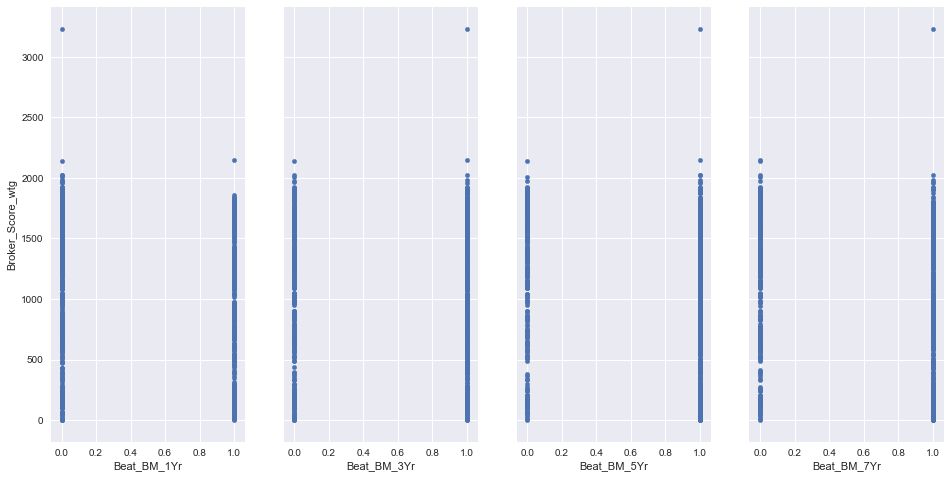

In [20]:
fig, axs = plt.subplots(1, 4, sharey=True)
cleandata.plot(kind='scatter', x='Beat_BM_1Yr', y='Broker_Score_wtg', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='Beat_BM_3Yr', y='Broker_Score_wtg', ax=axs[1])
cleandata.plot(kind='scatter', x='Beat_BM_5Yr', y='Broker_Score_wtg', ax=axs[2])
cleandata.plot(kind='scatter', x='Beat_BM_7Yr', y='Broker_Score_wtg', ax=axs[3])

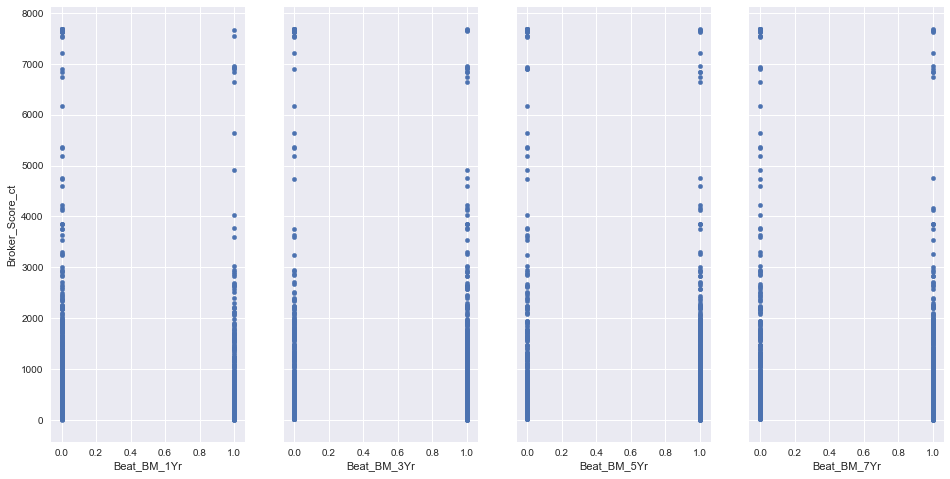

In [21]:
fig, axs = plt.subplots(1, 4, sharey=True)
cleandata.plot(kind='scatter', x='Beat_BM_1Yr', y='Broker_Score_ct', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='Beat_BM_3Yr', y='Broker_Score_ct', ax=axs[1])
cleandata.plot(kind='scatter', x='Beat_BM_5Yr', y='Broker_Score_ct', ax=axs[2])
cleandata.plot(kind='scatter', x='Beat_BM_7Yr', y='Broker_Score_ct', ax=axs[3])

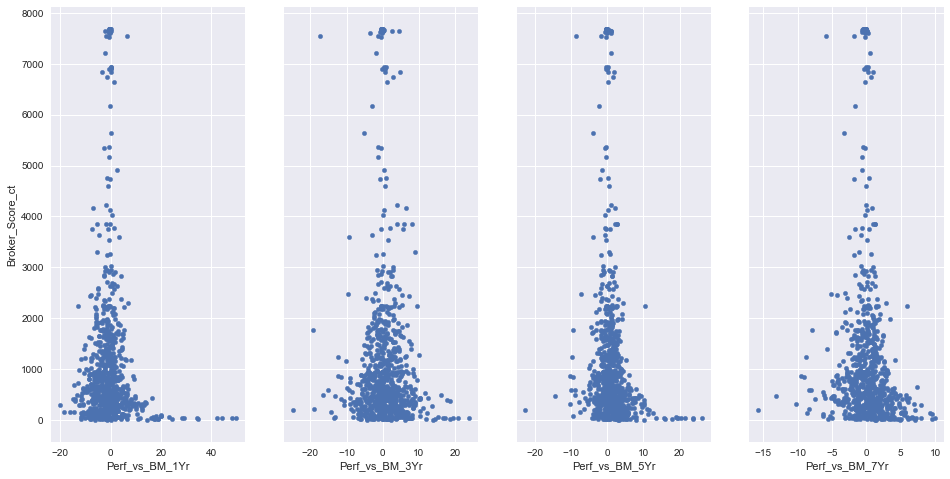

In [22]:
fig, axs = plt.subplots(1, 4, sharey=True)
cleandata.plot(kind='scatter', x='Perf_vs_BM_1Yr', y='Broker_Score_ct', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='Perf_vs_BM_3Yr', y='Broker_Score_ct', ax=axs[1])
cleandata.plot(kind='scatter', x='Perf_vs_BM_5Yr', y='Broker_Score_ct', ax=axs[2])
cleandata.plot(kind='scatter', x='Perf_vs_BM_7Yr', y='Broker_Score_ct', ax=axs[3])

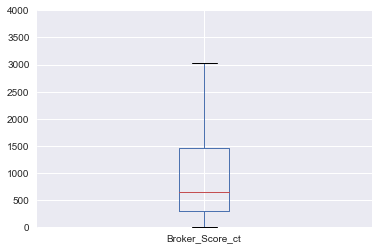

In [23]:
cleandata['Broker_Score_ct'].plot(kind='box',ylim=(-10,4000))

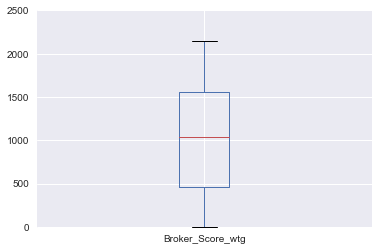

In [24]:
cleandata['Broker_Score_wtg'].plot(kind='box',ylim=(-10,2500))

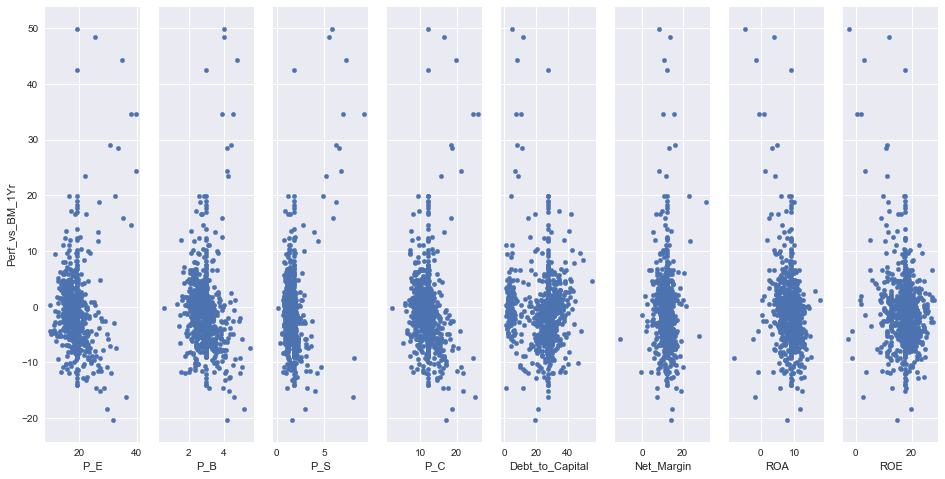

In [25]:
fig, axs = plt.subplots(1, 8, sharey=True)
cleandata.plot(kind='scatter', x='P_E', y='Perf_vs_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_B', y='Perf_vs_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_S', y='Perf_vs_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_C', y='Perf_vs_BM_1Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Perf_vs_BM_1Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Net_Margin', y='Perf_vs_BM_1Yr', ax=axs[5])
cleandata.plot(kind='scatter', x='ROA', y='Perf_vs_BM_1Yr', ax=axs[6])
cleandata.plot(kind='scatter', x='ROE', y='Perf_vs_BM_1Yr', ax=axs[7])

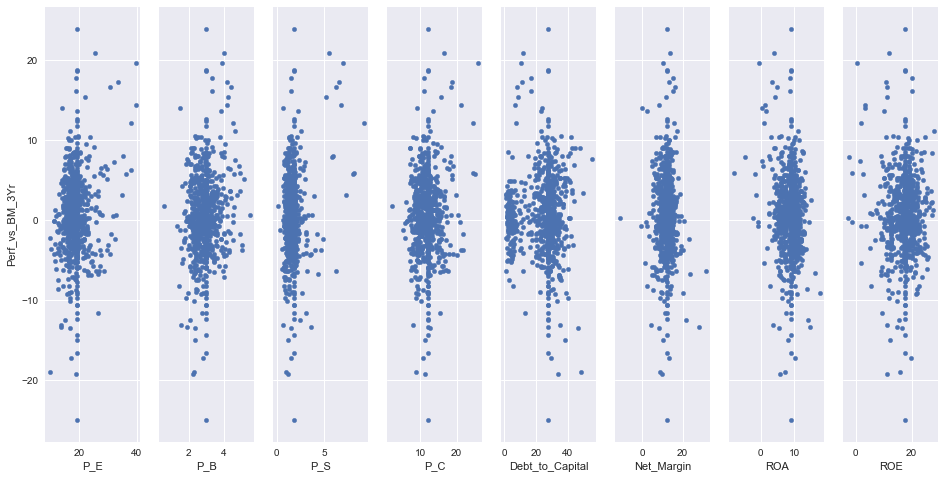

In [26]:
fig, axs = plt.subplots(1, 8, sharey=True)
cleandata.plot(kind='scatter', x='P_E', y='Perf_vs_BM_3Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_B', y='Perf_vs_BM_3Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_S', y='Perf_vs_BM_3Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_C', y='Perf_vs_BM_3Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Perf_vs_BM_3Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Net_Margin', y='Perf_vs_BM_3Yr', ax=axs[5])
cleandata.plot(kind='scatter', x='ROA', y='Perf_vs_BM_3Yr', ax=axs[6])
cleandata.plot(kind='scatter', x='ROE', y='Perf_vs_BM_3Yr', ax=axs[7])

KeyError: 'Beat_BM_5Yr'

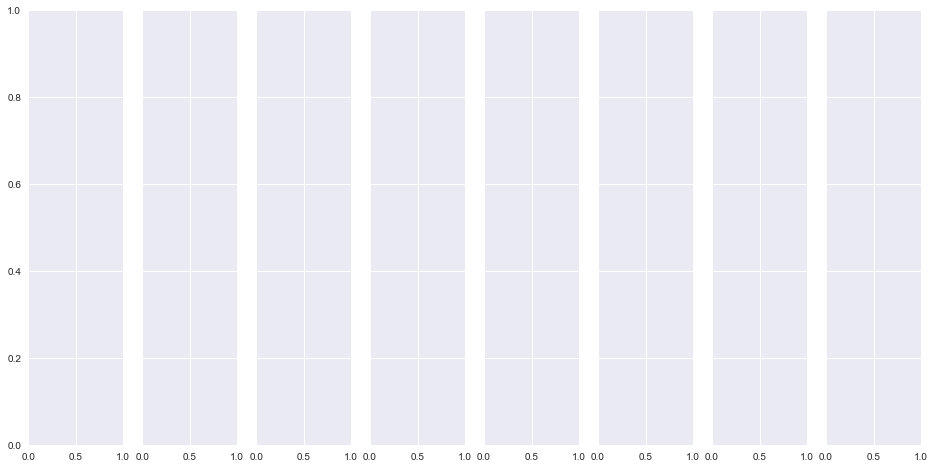

In [27]:
fig, axs = plt.subplots(1, 8, sharey=True)
data.plot(kind='scatter', x='P_E', y='Beat_BM_5Yr', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='P_B', y='Beat_BM_5Yr', ax=axs[1])
data.plot(kind='scatter', x='P_S', y='Beat_BM_5Yr', ax=axs[2])
data.plot(kind='scatter', x='P_C', y='Beat_BM_5Yr', ax=axs[3])
data.plot(kind='scatter', x='Debt_to_Capital', y='Beat_BM_5Yr', ax=axs[4])
data.plot(kind='scatter', x='Net_Margin', y='Beat_BM_5Yr', ax=axs[5])
data.plot(kind='scatter', x='ROA', y='Beat_BM_5Yr', ax=axs[6])
data.plot(kind='scatter', x='ROE', y='Beat_BM_5Yr', ax=axs[7])

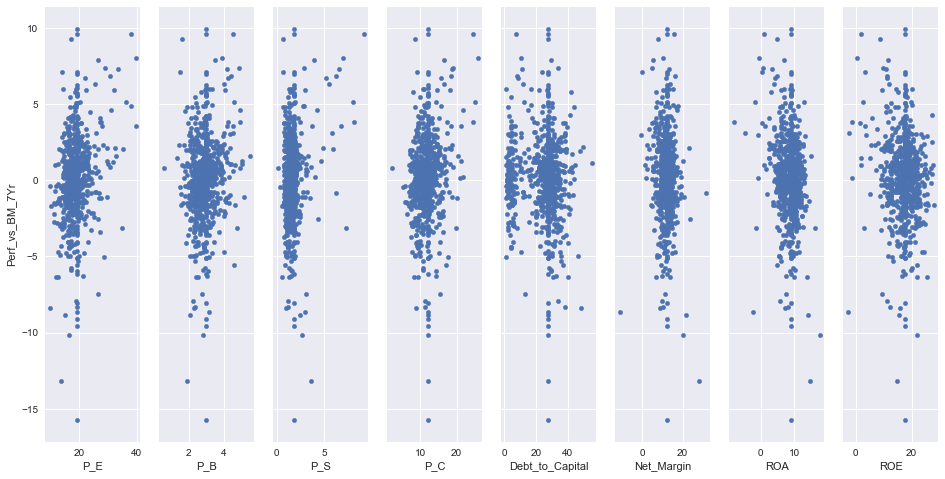

In [28]:
fig, axs = plt.subplots(1, 8, sharey=True)
cleandata.plot(kind='scatter', x='P_E', y='Perf_vs_BM_7Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_B', y='Perf_vs_BM_7Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_S', y='Perf_vs_BM_7Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_C', y='Perf_vs_BM_7Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Perf_vs_BM_7Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Net_Margin', y='Perf_vs_BM_7Yr', ax=axs[5])
cleandata.plot(kind='scatter', x='ROA', y='Perf_vs_BM_7Yr', ax=axs[6])
cleandata.plot(kind='scatter', x='ROE', y='Perf_vs_BM_7Yr', ax=axs[7])

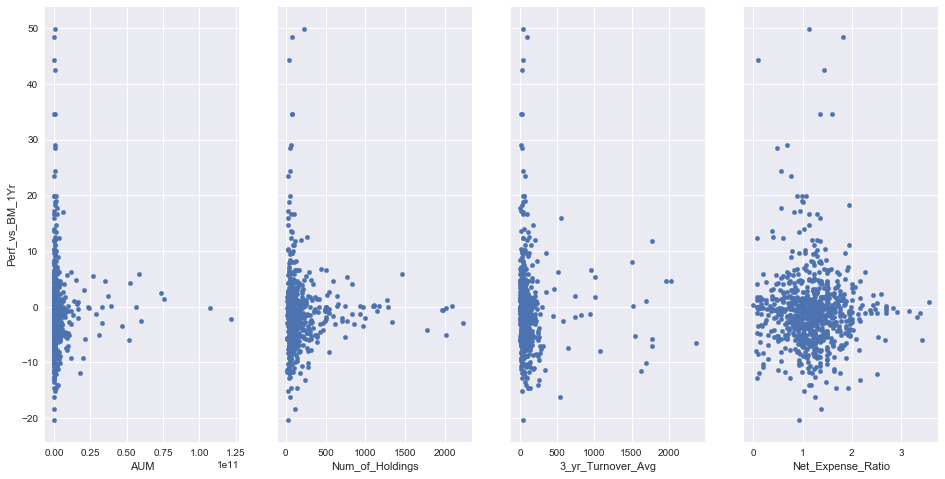

In [29]:
fig, axs = plt.subplots(1, 4, sharey=True)
cleandata.plot(kind='scatter', x='AUM', y='Perf_vs_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='Num_of_Holdings', y='Perf_vs_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='3_yr_Turnover_Avg', y='Perf_vs_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='Net_Expense_Ratio', y='Perf_vs_BM_1Yr', ax=axs[3])


          P_E       P_B       P_S       P_C
P_E  1.000000  0.559662  0.708085  0.834741
P_B  0.559662  1.000000  0.582962  0.672801
P_S  0.708085  0.582962  1.000000  0.719791
P_C  0.834741  0.672801  0.719791  1.000000
Axes(0.125,0.125;0.62x0.755)


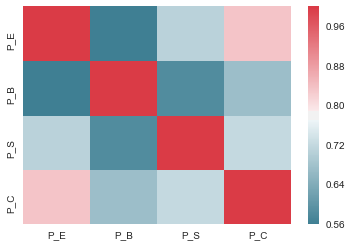

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['P_E', 'P_B', 'P_S', 'P_C']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


                 Debt_to_Capital  Net_Margin       ROA       ROE
Debt_to_Capital         1.000000   -0.147041  0.123623 -0.147119
Net_Margin             -0.147041    1.000000  0.711121  0.591415
ROA                     0.123623    0.711121  1.000000  0.779433
ROE                    -0.147119    0.591415  0.779433  1.000000
Axes(0.125,0.125;0.62x0.755)


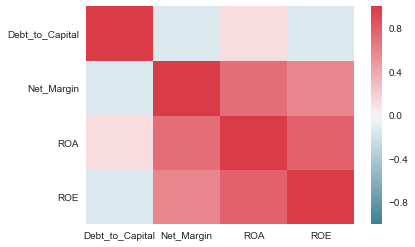

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['Debt_to_Capital', 'Net_Margin','ROA', 'ROE']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [32]:
cleandata.describe()

,Broker_Score_ct,Broker_Score_wtg,1_Yr_Return,3_Yr_Return,5_Yr_Return,7_Yr_Return,1_Yr_Return_BM,3_Yr_Return_BM,5_Yr_Return_BM,7_Yr_Return_BM,...,ROA,ROE,Beat_BM_1Yr,Beat_BM_3Yr,Beat_BM_5Yr,Beat_BM_7Yr,Perf_vs_BM_1Yr,Perf_vs_BM_3Yr,Perf_vs_BM_5Yr,Perf_vs_BM_7Yr
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,...,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,1280.656604,1006.616352,16.858302,-7.011384,4.334579,4.432101,17.584830,-7.617371,3.245094,4.269472,...,8.525793,17.205578,0.376101,0.544654,0.613836,0.542138,-0.726528,0.605987,1.089484,0.162629
std,1770.979240,610.730491,9.468219,5.082961,4.343654,2.813842,6.343275,1.294363,2.517192,1.216788,...,2.591118,4.207982,0.484711,0.498316,0.487175,0.498535,6.863334,5.012947,3.994948,2.672285
min,2.000000,4.000000,-5.770000,-33.090000,-20.450000,-11.640000,14.530000,-8.210000,2.260000,2.820000,...,-7.990000,-2.900000,0.000000,0.000000,0.000000,0.000000,-20.300000,-24.960000,-22.710000,-15.720000
25%,297.500000,466.000000,10.905000,-9.635000,2.085000,3.015000,14.530000,-8.130000,2.260000,4.080000,...,6.975000,15.680000,0.000000,0.000000,0.000000,0.000000,-4.435000,-1.830000,-0.720000,-1.095000
50%,646.000000,1040.000000,14.430000,-7.020000,3.710000,4.350000,14.530000,-8.130000,2.260000,4.080000,...,9.128812,17.711211,0.000000,1.000000,1.000000,1.000000,-1.020000,0.290000,0.740000,0.170000
75%,1460.000000,1558.500000,20.410000,-4.065000,5.795000,5.875000,16.350000,-8.130000,3.340000,4.080000,...,10.160000,19.620000,1.000000,1.000000,1.000000,1.000000,1.305000,3.325000,2.600000,1.435000
max,7686.000000,3230.000000,64.410000,15.750000,28.430000,14.010000,36.380000,-2.990000,13.830000,9.190000,...,17.520000,27.860000,1.000000,1.000000,1.000000,1.000000,49.880000,23.880000,26.170000,9.930000


In [33]:
cleandata.isnull().sum()

Ticker                 0
Broker_Score_ct        0
Broker_Score_wtg       0
Benchmark              0
1_Yr_Return            0
3_Yr_Return            0
5_Yr_Return            0
7_Yr_Return            0
1_Yr_Return_BM         0
3_Yr_Return_BM         0
5_Yr_Return_BM         0
7_Yr_Return_BM         0
AUM                    5
AUM_2016               0
Num_of_Holdings      173
Turnover_2005         20
Turnover_2004        181
Turnover_2003        243
3_yr_Turnover_Avg     14
Net_Expense_Ratio      3
Avg_Mkt_Cap_M        171
P_E                    0
P_B                    0
P_S                    0
P_C                    0
Debt_to_Capital        0
Net_Margin             0
ROA                    0
ROE                    0
Beat_BM_1Yr            0
Beat_BM_3Yr            0
Beat_BM_5Yr            0
Beat_BM_7Yr            0
Perf_vs_BM_1Yr         0
Perf_vs_BM_3Yr         0
Perf_vs_BM_5Yr         0
Perf_vs_BM_7Yr         0
dtype: int64

In [52]:
lm = LogisticRegression()

lm.fit(cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE']], \
       cleandata['Beat_BM_1Yr'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
lm3 = LogisticRegression()
lm3.fit(cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE']], \
       cleandata['Beat_BM_3Yr'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lm5 = LogisticRegression()
lm5.fit(cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE']], \
       cleandata['Beat_BM_5Yr'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
lm7 = LogisticRegression()
lm7.fit(cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE']], \
       cleandata['Beat_BM_7Yr'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print cleandata.Beat_BM_1Yr.mean()

[[ 0.99963483  1.02629787  0.67179169  1.88323323  0.77930716  1.02207197
   1.11716475  0.70179026  1.12766053]]
[ 4.35135933]
0.376100628931


In [60]:
feature_set = cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE']]
print lm.score(feature_set, cleandata['Beat_BM_1Yr'])

0.646540880503


In [ ]:
#The accuracy of the model with all features (removing one rank) is ~65%.

In [71]:
roc_auc_score(cleandata['Beat_BM_1Yr'], lm.predict(feature_set))

0.57393596936023306

In [57]:
print np.exp(lm3.coef_)
print np.exp(lm3.intercept_)
print cleandata.Beat_BM_3Yr.mean()

[[ 0.99978904  1.04682392  1.45419146  1.3319353   0.89358806  1.01789394
   0.97212949  0.78172131  1.1500779 ]]
[ 0.33978584]
0.54465408805


In [61]:
print lm3.score(feature_set, cleandata['Beat_BM_3Yr'])

0.601257861635


In [ ]:
#The accuracy of the model with all features (removing one rank) is ~60%.

In [70]:
roc_auc_score(cleandata['Beat_BM_3Yr'], lm3.predict(feature_set))

0.58502928304390533

In [58]:
print np.exp(lm5.coef_)
print np.exp(lm5.intercept_)
print cleandata.Beat_BM_5Yr.mean()

[[ 0.99951389  1.04370833  1.44126967  2.31239082  1.02986976  1.00941106
   0.95127028  0.77832268  1.11478269]]
[ 0.16044122]
0.613836477987


In [64]:
print lm5.score(feature_set, cleandata['Beat_BM_5Yr'])

0.677987421384


In [ ]:
#The accuracy of the model with all features (removing one rank) is ~68%.

In [69]:
roc_auc_score(cleandata['Beat_BM_5Yr'], lm5.predict(feature_set))

0.621118572115128

In [59]:
print np.exp(lm7.coef_)
print np.exp(lm7.intercept_)
print cleandata.Beat_BM_7Yr.mean()

[[ 0.99936936  1.06384734  1.10385736  1.22245289  1.08170191  0.9954939
   0.94154497  0.84470063  1.10980801]]
[ 0.25459019]
0.54213836478


In [65]:
print lm7.score(feature_set, cleandata['Beat_BM_7Yr'])

0.635220125786


In [ ]:
#The accuracy of the model with all features (removing one rank) is ~63%.

In [68]:
roc_auc_score(cleandata['Beat_BM_7Yr'], lm7.predict(feature_set))

0.62577764462915275

In [37]:
datafactors = cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE']]

sc = StandardScaler()
scaled_feature = sc.fit_transform(datafactors)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(cleandata), n_folds=5),
    scoring='recall'
)

gs.fit(scaled_feature, cleandata.Beat_BM_1Yr)
gs.grid_scores_

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.38589, std: 0.23420, params: {'C': 1, 'class_weight': None},
 mean: 0.63770, std: 0.16883, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.38871, std: 0.23972, params: {'C': 2, 'class_weight': None},
 mean: 0.63081, std: 0.16247, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.38871, std: 0.23972, params: {'C': 3, 'class_weight': None},
 mean: 0.63081, std: 0.16247, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.38871, std: 0.23972, params: {'C': 4, 'class_weight': None},
 mean: 0.63081, std: 0.16247, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.39026, std: 0.25202, params: {'C': 5, 'class_weight': None},
 mean: 0.63081, std: 0.16247, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.38618, std: 0.25351, params: {'C': 6, 'class_weight': None},
 mean: 0.63081, std: 0.16247, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.38618, std: 0.25351, params: {'C': 7, 'class_weight': None},
 mean: 0.63081, std: 0.16247, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [38]:
gs3 = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(cleandata), n_folds=5),
    scoring='recall'
)

gs3.fit(scaled_feature, cleandata.Beat_BM_3Yr)
gs3.grid_scores_

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.77816, std: 0.11073, params: {'C': 1, 'class_weight': None},
 mean: 0.60261, std: 0.16466, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.77325, std: 0.11066, params: {'C': 2, 'class_weight': None},
 mean: 0.60261, std: 0.16466, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.77087, std: 0.11452, params: {'C': 3, 'class_weight': None},
 mean: 0.60935, std: 0.16212, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.77087, std: 0.11452, params: {'C': 4, 'class_weight': None},
 mean: 0.60935, std: 0.16212, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.77087, std: 0.11452, params: {'C': 5, 'class_weight': None},
 mean: 0.61162, std: 0.16128, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.76849, std: 0.11845, params: {'C': 6, 'class_weight': None},
 mean: 0.61162, std: 0.16128, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.76849, std: 0.11845, params: {'C': 7, 'class_weight': None},
 mean: 0.61162, std: 0.16128, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [42]:
gs5 = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(cleandata), n_folds=5),
    scoring='recall'
)

gs5.fit(scaled_feature, cleandata.Beat_BM_3Yr)
gs5.grid_scores_

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.77816, std: 0.11073, params: {'C': 1, 'class_weight': None},
 mean: 0.60261, std: 0.16466, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.77325, std: 0.11066, params: {'C': 2, 'class_weight': None},
 mean: 0.60261, std: 0.16466, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.77087, std: 0.11452, params: {'C': 3, 'class_weight': None},
 mean: 0.60935, std: 0.16212, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.77087, std: 0.11452, params: {'C': 4, 'class_weight': None},
 mean: 0.60935, std: 0.16212, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.77087, std: 0.11452, params: {'C': 5, 'class_weight': None},
 mean: 0.61162, std: 0.16128, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.76849, std: 0.11845, params: {'C': 6, 'class_weight': None},
 mean: 0.61162, std: 0.16128, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.76849, std: 0.11845, params: {'C': 7, 'class_weight': None},
 mean: 0.61162, std: 0.16128, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [41]:
gs7 = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(cleandata), n_folds=5),
    scoring='recall'
)

gs7.fit(scaled_feature, cleandata.Beat_BM_7Yr)
gs7.grid_scores_

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.75146, std: 0.14475, params: {'C': 1, 'class_weight': None},
 mean: 0.69211, std: 0.17557, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.75406, std: 0.14323, params: {'C': 2, 'class_weight': None},
 mean: 0.69049, std: 0.17406, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.75406, std: 0.14323, params: {'C': 3, 'class_weight': None},
 mean: 0.69049, std: 0.17406, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.75165, std: 0.14504, params: {'C': 4, 'class_weight': None},
 mean: 0.69049, std: 0.17406, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.75425, std: 0.14376, params: {'C': 5, 'class_weight': None},
 mean: 0.69049, std: 0.17406, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.75425, std: 0.14376, params: {'C': 6, 'class_weight': None},
 mean: 0.69049, std: 0.17406, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.75425, std: 0.14376, params: {'C': 7, 'class_weight': None},
 mean: 0.69049, std: 0.17406, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [43]:
print('Best 1Yr Estimator:', gs.best_estimator_)
print('Best 3Yr Estimator:',gs3.best_estimator_)
print('Best 5Yr Estimator:',gs5.best_estimator_)
print('Best 7Yr Estimator:',gs7.best_estimator_)

('Best 1Yr Estimator:', LogisticRegression(C=1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('Best 3Yr Estimator:', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('Best 5Yr Estimator:', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('Best 7Yr Estimator:', LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_

In [44]:
zip(['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE'],gs.best_estimator_.coef_[0])

[('Broker_Score_wtg', -0.24024397763613231),
 ('P_E', -0.11200906364667401),
 ('P_B', -0.2716642241175854),
 ('P_S', 0.73213915865713675),
 ('P_C', -0.70609985693915978),
 ('Debt_to_Capital', 0.14960802539004381),
 ('Net_Margin', 0.21554333975847911),
 ('ROA', -0.76919581522034086),
 ('ROE', 0.34661394776542503)]

In [45]:
zip(['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE'],gs3.best_estimator_.coef_[0])

[('Broker_Score_wtg', -0.12587086002346654),
 ('P_E', 0.23130917931970432),
 ('P_B', 0.19980603027318763),
 ('P_S', 0.19889450019409213),
 ('P_C', -0.2649562168226734),
 ('Debt_to_Capital', 0.20638493508288416),
 ('Net_Margin', -0.055475134058548696),
 ('ROA', -0.68202618764560263),
 ('ROE', 0.6593025621735078)]

In [46]:
zip(['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE'],gs5.best_estimator_.coef_[0])

[('Broker_Score_wtg', -0.12587086002346654),
 ('P_E', 0.23130917931970432),
 ('P_B', 0.19980603027318763),
 ('P_S', 0.19889450019409213),
 ('P_C', -0.2649562168226734),
 ('Debt_to_Capital', 0.20638493508288416),
 ('Net_Margin', -0.055475134058548696),
 ('ROA', -0.68202618764560263),
 ('ROE', 0.6593025621735078)]

In [47]:
zip(['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA','ROE'],gs7.best_estimator_.coef_[0])

[('Broker_Score_wtg', -0.38521493113739669),
 ('P_E', 0.33775214948912435),
 ('P_B', 0.014006630632611742),
 ('P_S', 0.092939206576267419),
 ('P_C', 0.25814536700430651),
 ('Debt_to_Capital', -0.015350742807318506),
 ('Net_Margin', -0.12683036572145445),
 ('ROA', -0.53651223521840841),
 ('ROE', 0.5731767559257831)]

In [75]:
gs5.best_estimator_.classes_

array([0, 1])

# Random Forest

In [154]:
rfdata = cleandata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA',\
                   'ROE','Beat_BM_1Yr','Beat_BM_3Yr','Beat_BM_5Yr','Beat_BM_7Yr']]

In [155]:
rfdata.shape

(795, 13)

In [156]:
rfdata.dtypes

Broker_Score_wtg      int64
P_E                 float64
P_B                 float64
P_S                 float64
P_C                 float64
Debt_to_Capital     float64
Net_Margin          float64
ROA                 float64
ROE                 float64
Beat_BM_1Yr           int64
Beat_BM_3Yr           int64
Beat_BM_5Yr           int64
Beat_BM_7Yr           int64
dtype: object

In [144]:
#rfdata['Beat_BM_1Yr_Bool'] = rfdata['Beat_BM_1Yr'].astype('bool')
#rfdata['Beat_BM_3Yr_Bool'] = rfdata['Beat_BM_3Yr'].astype('bool')
#rfdata['Beat_BM_5Yr_Bool'] = rfdata['Beat_BM_5Yr'].astype('bool')
#rfdata['Beat_BM_7Yr_Bool'] = rfdata['Beat_BM_7Yr'].astype('bool')

/Users/michaeltong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/michaeltong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/michaeltong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [157]:
rfdata

,Broker_Score_wtg,P_E,P_B,P_S,P_C,Debt_to_Capital,Net_Margin,ROA,ROE,Beat_BM_1Yr,Beat_BM_3Yr,Beat_BM_5Yr,Beat_BM_7Yr
1,1621,17.040000,2.830000,1.300000,10.950000,25.580000,11.700000,9.770000,19.220000,0,1,1,1
2,1575,19.530000,2.570000,1.760000,12.340000,32.810000,11.850000,9.440000,17.560000,0,1,0,1
3,1553,17.160000,2.890000,1.700000,11.880000,26.750000,14.470000,11.450000,21.900000,1,1,1,1
4,1774,19.278561,3.009002,1.806960,12.214384,27.544370,12.343135,9.128812,17.711211,1,1,1,1
5,1236,21.360000,3.370000,1.910000,13.210000,21.060000,13.910000,9.200000,17.090000,0,0,1,0
6,611,29.760000,4.350000,1.810000,17.900000,24.100000,9.820000,3.530000,11.360000,0,1,1,1
8,1382,17.410000,2.790000,1.300000,10.530000,27.790000,11.320000,8.400000,18.260000,1,1,1,0
9,1459,23.960000,3.930000,2.570000,17.160000,27.250000,15.420000,7.660000,17.210000,0,1,1,1
10,746,25.160000,3.740000,1.690000,14.460000,20.600000,12.640000,10.290000,17.880000,1,1,1,1
11,748,16.200000,2.430000,1.280000,8.670000,30.020000,11.010000,8.060000,18.510000,1,1,1,1


In [159]:
rfdata['train'] = np.random.uniform(0, 1, len(rfdata)) <= .75

/Users/michaeltong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [160]:
train, test = rfdata[rfdata['train']==True], rfdata[rfdata['train']==False]

In [161]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

('Number of observations in the training data:', 587)
('Number of observations in the test data:', 208)


In [130]:
#features = rfdata[['Broker_Score_wtg','P_E','P_B','P_S','P_C','Debt_to_Capital','Net_Margin','ROA',\
                   'ROE','Beat_BM_1Yr_Bool','Beat_BM_3Yr_Bool','Beat_BM_5Yr_Bool','Beat_BM_7Yr_Bool']]

In [162]:
features = rfdata.columns[:9]
features

Index([u'Broker_Score_wtg', u'P_E', u'P_B', u'P_S', u'P_C', u'Debt_to_Capital',
       u'Net_Margin', u'ROA', u'ROE'],
      dtype='object')

In [167]:
clf = RandomForestClassifier(n_jobs=2)

clf.fit(train[features], train.Beat_BM_1Yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [168]:
clf3 = RandomForestClassifier(n_jobs=2)

clf3.fit(train[features], train.Beat_BM_3Yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [169]:
clf5 = RandomForestClassifier(n_jobs=2)

clf5.fit(train[features], train.Beat_BM_5Yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [170]:
clf7 = RandomForestClassifier(n_jobs=2)

clf7.fit(train[features], train.Beat_BM_7Yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [171]:
clf.predict(test[features])

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0])

In [172]:
clf.predict_proba(test[features])[0:10]

array([[ 0.7,  0.3],
       [ 0.9,  0.1],
       [ 0.7,  0.3],
       [ 0.1,  0.9],
       [ 0.9,  0.1],
       [ 0.7,  0.3],
       [ 0.3,  0.7],
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 0.7,  0.3]])

In [173]:
clf3.predict(test[features])

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0])

In [174]:
clf3.predict_proba(test[features])[0:10]

array([[ 0.7,  0.3],
       [ 0.5,  0.5],
       [ 0.4,  0.6],
       [ 0.7,  0.3],
       [ 0.2,  0.8],
       [ 0.6,  0.4],
       [ 0.7,  0.3],
       [ 0.9,  0.1],
       [ 0.1,  0.9],
       [ 0.6,  0.4]])

In [175]:
clf5.predict(test[features])

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0])

In [176]:
clf5.predict_proba(test[features])[0:10]

array([[ 0.7,  0.3],
       [ 0.1,  0.9],
       [ 0.5,  0.5],
       [ 0.3,  0.7],
       [ 0. ,  1. ],
       [ 0.7,  0.3],
       [ 0.6,  0.4],
       [ 0. ,  1. ],
       [ 0.3,  0.7],
       [ 0.7,  0.3]])

In [177]:
clf7.predict(test[features])

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1])

In [178]:
clf7.predict_proba(test[features])[0:10]

array([[ 0.6,  0.4],
       [ 0.4,  0.6],
       [ 0.7,  0.3],
       [ 0.1,  0.9],
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 0.6,  0.4],
       [ 0.5,  0.5],
       [ 0.3,  0.7],
       [ 0.6,  0.4]])

In [179]:
list(zip(train[features], clf.feature_importances_))

[('Broker_Score_wtg', 0.26938335420213444),
 ('P_E', 0.10356360120574562),
 ('P_B', 0.091648376687721897),
 ('P_S', 0.062363601689239954),
 ('P_C', 0.094716184054092017),
 ('Debt_to_Capital', 0.092595083650378066),
 ('Net_Margin', 0.072369124948105948),
 ('ROA', 0.11155296128589662),
 ('ROE', 0.10180771227668535)]

In [185]:
factors = train[features].columns
factor_importances = clf.feature_importances_

features_df = pd.DataFrame({'Factors': features, 'Importance Score': factor_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Factors,Importance Score
0,Broker_Score_wtg,0.269383
7,ROA,0.111553
1,P_E,0.103564
8,ROE,0.101808
4,P_C,0.094716


In [180]:
list(zip(train[features], clf3.feature_importances_))

[('Broker_Score_wtg', 0.27911215418688751),
 ('P_E', 0.11080673111432666),
 ('P_B', 0.10157081132990756),
 ('P_S', 0.059862599685501061),
 ('P_C', 0.077942476622992446),
 ('Debt_to_Capital', 0.084407991363213225),
 ('Net_Margin', 0.08440673660354478),
 ('ROA', 0.10615209724395083),
 ('ROE', 0.09573840184967583)]

In [186]:
factors = train[features].columns
factor_importances3 = clf3.feature_importances_

features_df3 = pd.DataFrame({'Factors': features, 'Importance Score': factor_importances3})
features_df3.sort_values('Importance Score', inplace=True, ascending=False)

features_df3.head()

,Factors,Importance Score
0,Broker_Score_wtg,0.279112
1,P_E,0.110807
7,ROA,0.106152
2,P_B,0.101571
8,ROE,0.095738


In [181]:
list(zip(train[features], clf5.feature_importances_))

[('Broker_Score_wtg', 0.26603342736053109),
 ('P_E', 0.098338422194843553),
 ('P_B', 0.11428298587179979),
 ('P_S', 0.083474435801840621),
 ('P_C', 0.081176720078088849),
 ('Debt_to_Capital', 0.084838497845035443),
 ('Net_Margin', 0.084462059554675978),
 ('ROA', 0.096666353120314061),
 ('ROE', 0.090727098172870529)]

In [187]:
factors = train[features].columns
factor_importances5 = clf5.feature_importances_

features_df5 = pd.DataFrame({'Factors': features, 'Importance Score': factor_importances5})
features_df5.sort_values('Importance Score', inplace=True, ascending=False)

features_df5.head()

,Factors,Importance Score
0,Broker_Score_wtg,0.266033
2,P_B,0.114283
1,P_E,0.098338
7,ROA,0.096666
8,ROE,0.090727


In [182]:
list(zip(train[features], clf7.feature_importances_))

[('Broker_Score_wtg', 0.27915449385052082),
 ('P_E', 0.093285444079135346),
 ('P_B', 0.096392678418682667),
 ('P_S', 0.097733089051041555),
 ('P_C', 0.088386042972233),
 ('Debt_to_Capital', 0.087970379492678857),
 ('Net_Margin', 0.091314144896822519),
 ('ROA', 0.079537398361797948),
 ('ROE', 0.086226328877087324)]

In [188]:
factors = train[features].columns
factor_importances7 = clf7.feature_importances_

features_df7 = pd.DataFrame({'Factors': features, 'Importance Score': factor_importances7})
features_df7.sort_values('Importance Score', inplace=True, ascending=False)

features_df7.head()

,Factors,Importance Score
0,Broker_Score_wtg,0.279154
3,P_S,0.097733
2,P_B,0.096393
1,P_E,0.093285
6,Net_Margin,0.091314
